In [1]:
#this imports important libraries and reads in the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import seaborn as sns
data=pd.read_excel('Transfer_MSU.xlsx')
data1=pd.read_excel('Transfer_MSU1.xlsx')

In [2]:
#this creates lists filled with certain majors
stem_majors_other=[' Animal Husbandry ', ' Integrative Biology ', ' Geology ', ' Envir & Natural Res Policy Std ',' Geophysics ',' Accounting ',' Agr & Nat Res   No Preference',' Ag,Food & Natural Resources Ed ',' Agri Business',' Agribusiness Management ',' Agric & Natural Resources Comm ',' Agricultural Industries ',' Agricultural Operations ',' Agriscience ',' Animal Science ',' Anthropology ',' Applied Plant Science ',' Audiology and Speech Sciences ',' Beef Cattle Management ',' Biological Science ',' Biological Science Interdept',' Biology ',' Biomedical Laboratory Science ',' Botany ',' Botany and Plant Pathology ',' Building Construction Mgt ',' Cell and Molecular Biology ',' Clinical Laboratory Sciences ',' Communication ',' Communicative Sci & Disorders ',' Crop and Soil Sciences ',' Diagnostic Molecular Science ',' Dietetics ',' Earth Science Interdept',' Earth Science ',' Economic Geography ',' Electrical Technology ',' Entomology ',' Envir Biol/Botany & Plant Path ',' Envir Biology/Microbiology ',' Envir Biology/Plant Biology ',' Envir Studies & Sustainability ' ,' Envir Studies and Agriscience ',' Environ Biology/Microbiology ',' Environ Studies & Applications ',' Environmental Biol/Plant Biol ',' Environmental Biology/Botany ',' Environmental Biology/Zoology ',' Environmental Economics & Mgt ',' Environmental Economics&Policy ',' Environmental Geography ',' Environmental Geosciences ',' Environmental Sci & Mgt ',' Environmental Soil Science ',' Epidemiology ',' Fisheries and Wildlife ',' Food Science ',' Forensic Science ',' Forestry ',' Fruit & Vegetable Crop Mgt ',' General Science ',' General Science Interdept',' Genomics & Molecular Genetics ',' Geographic Information Science ',' Geography ',' Geological Sciences ',' Global & Area Studies Soc Sci',' Global & Intl Stdys in Soc Sci ',' Graphic Design ',' Horticulture ',' Human Biology ',' Human Geography ',' Human Medicine ',' Integrative Pharmacology ',' Intr Stdy S S Public Plcy Stdy',' Intr Stdy Soc Sci Cmty Rel',' Intr Stdy Soc Sci Envir Policy',' Intr Stdy Soc Sci Health Stdy',' Intr Stdy Soc Sci Hm Res Scty',' Intr Stdy Soc Sci Human Aging',' Intr Stdy Soc Sci Intl Studies',' Intr Stdy Soc Sci Law&Society',' Intr Stdys Soc Sci: Soc Sci Ed ',' Intr Studies in Social Science ',' Kinesiology ',' LBS Animal Science ',' Media Arts and Technology ',' Media and Communication Tech ',' Microbiol & Molecular Genetics ',' Microbiology ',' Natural Res Recreation & Tour ',' Natural Science No Preference',' Neuroscience ',' Nursing ',' Nutritional Sciences ',' Organic Farming ',' Osteopathic Medicine ',' Pharmacology & Toxicology ',' Physical Science ',' Physical Science Interdept',' Physiology ',' Plant Biology ',' Plant Breeding & Genetics CSS',' Plant Pathology ',' Predental ',' Premedical ',' Prenursing ',' Preoptometry ',' Preveterinary ',' Psychology ',' Public Health ',' School Psychology ',' Science & Technology Studies ',' Swine Management ',' Technology Systems Management ',' Telecommunication ',' Urban and Regional Planning ',' Veterinary Medicine ',' Veterinary Technology ',' Viticulture ',' Zoology ']

stem_majors_math_intensive=[' Chemistry ',' Statistics ',' Chemical Physics ',' Physics and Geophysics ',' Actuarial Science ',' Applied Mathematics ',' Applied Statistics ',' Biochemistry ',' Biochem&Molecular Biol/Biotech ',' Biochemistry & Molecular Biol ',' Biochemistry/Biotechnology ',' Computational Chemistry ',' Computational Mathematics ',' Computer Science ',' Finance ',' Industrial Mathematics ',' Mathematics ',' Mathematics, Advanced ']

nonstem_majors=[' Public Administration ', ' Criminalistics ',  ' Personnel Administration ', ' Park and Recreation Resources ', ' Financial Administration ', ' Home Economics ', ' Social Science Law, Democracy', ' Food: Technology & Management ', ' Applied Music ', ' Apparel Design and Textiles ', ' Music   No Major', ' Social Science ',' Social Science Prelaw', ' Hotel & Restaurant Management ', ' Art Practice ', ' Humanities ', ' MLM Logistics', ' Advertising ',' African American & African Std ',' American Studies ',' Ancient Studies ',' Apparel and Textile Design ',' Apparel and Textiles ',' Arabic ',' Art History and Visual Culture ',' Arts & Letters   General',' Arts and Humanities ',' Athletic Training ',' Business Analytics ',' Business Preference',' Business Administration ',' Business Admitted',' Child Development ',' Chinese ',' Classical Studies ',' Clinical Social Work ',' Commercial Floriculture ',' Community Sustainability ',' Comparative Culture & Politics ' ,' Composition ',' Composition and Music Theory ',' Construction Management ',' Criminal Justice ',' Dairy Management ',' Dairy Production ',' East Asian Languages & Culture ',' Economics ',' English ',' English Language Center ',' Experience Architecture ',' Family & Consumer Resources ',' Family Community Services ',' Family and Consumer Sciences ',' Film Studies ',' Food Industry Management ',' French ',' General Business Admin ',' General Business Admin Prelaw',' General Management ',' German ',' Global Stdys Arts & Humanities ',' Hist,Philosophy & Soc of Sci ',' History ',' History of Art ',' Horse Management ',' Hospitality Business ',' Human Devel and Family Studies ',' Human Devl and Family Studies ',' Human Resource Management ',' Human Resources and Labor Rel ',' Humanities Prelaw',' Interdisciplinary Humanities ',' Interior Design ',' Interior Design&Facilities Mgt ',' International Relations ',' James Madison ',' Japanese ',' Jazz Studies ',' Journalism ',' Landscape Architecture ',' Landscape Management ',' Landscape and Lawn Management ',' Landscape and Nursery ',' Landscape and Nursery Mgt ',' Language Program ',' Latin ',' Law ',' Linguistics ',' Livestock Industries ',' Management ',' Management,Strategy,Leadership ',' Manufacturing Engineering ',' Marketing ',' Media and Information ',' Medical Technology ',' Merchandising Management ',' Music ',' Music Education ',' Music Performance ',' Music Therapy ',' Park, Recreation & Tourism Res ',' Philosophy ',' Pol Theory&Constitutional Dem ',' Policy and Applied Economics ',' Political Economy ',' Political Science ',' Political Science Prelaw',' Professional Writing ',' Public Admin and Public Policy ',' Public Affairs Management ',' Public Policy ',' Public Resource Management ',' Religious Studies ',' Residential Coll in Arts & Hum ',' Resource Development ',' Retailing ',' Russian ',' School Music   No Major',' Social Relations ',' Social Relations and Policy ',' Social Work ',' Sociology ',' Spanish ',' Special E Emotional Impairment',' Sports and Commercial Turf Mgt ',' Studio Art ',' Supply Chain Management ',' Sustainable Parks,Rec and Tour ',' Teaching Cert Internship Year ',' Telecomm, Info Studies & Media ',' Theatre ',' Turfgrass Management ',' Turfgrass Management Golf'," Women's Studies "," Women's and Gender Studies ",' World Politics ']

Engineering=[' Agricultural Engineering Tech ', ' Agricultural Engineering ', ' Mechanics ', ' Applied Engineering Sciences ',' Biosystems Engineering ',' Chemical Engineering ',' Civil Engineering ',' Computer Engineering ',' Electrical Engineering ',' Engineering   No Preference',' Engineering Arts ',' Engineering Mechanics ',' Environmental Engineering ',' Materials Sci and Engineering ',' Mechanical Engineering ',' Packaging ']

phy_ast=[' Physics ',' Astrophysics ',' Astrophysics and Astronomy ']

education=[' Recreation and Youth Leadershp ', ' Physical Education ', ' Early Care and Education ',' Art Education ',' Curriculum and Teaching ',' Education ',' Elementary Education ',' History Education ',' Instrumental Music Education ',' Lifelong Education ',' Mathematics Education ',' Music Education ',' Phys Ed & Exercise Science ',' Special E Emotional Impairment',' Special Ed Deaf Education',' Special Ed Learn Disabilities',' Special Ed Visual Impairment',' Stringed Instrument Music Ed ',' Teaching and Curriculum ',' Vocal General Music Education']

other=[' High School Guest ',' Law Non Degree Guest',' Transient Major ']

no_preference=[' No Preference ']

lbs=[' LBS No Coordinate Major', ' LBS Medical Technology', ' LBS Human Biology ', ' LBS Astrophysics ',' LBS Animal Science ',' LBS Biochem and Molecular Biol ',' LBS Biochemistry ',' LBS Biochemistry/Biotechnology ',' LBS Biological Science ',' LBS Biology Field of Concent',' LBS Botany and Plant Pathology ',' LBS Chemical Physics ',' LBS Chemistry ',' LBS Computational Chemistry ',' LBS Computational Mathematics ',' LBS Computer Science ',' LBS Computer Science FC',' LBS Earth Science FC',' LBS Earth Science Interdept',' LBS Entomology ',' LBS Envir Biology/Plant Biol ',' LBS Envir Biology/Zoology ',' LBS Envir/Bio/Botany & Plant P ',' LBS Envir/Biology/Microbiology ',' LBS Environ Sci and Management ',' LBS Environmental Geosciences ',' LBS General Science Interdept',' LBS Genomics & Molecular Genet ',' LBS Geological Sciences ',' LBS Geological Sciences ',' LBS Mathematics ',' LBS Medical Technology ',' LBS Microbiology ',' LBS Nutritional Sciences ',' LBS Physical Science FC',' LBS Physical Science Interdept',' LBS Physics ',' LBS Physics and Geophysics ',' LBS Physiology ',' LBS Plant Biology ',' LBS Science & Tech Studies FC',' LBS Statistics ',' LBS Zoology ',' Lyman Briggs ',' Lyman Briggs School ']

In [3]:
#this changes the lists from before so we can use them.
new_stem_other=[]
for i in stem_majors_other:
    g = list(i)
    g.pop(0)
    g.pop(-1)
    i = "".join(g)
    new_stem_other.append(i)

new_stem_MI=[]
for i in stem_majors_math_intensive:
    g = list(i)
    g.pop(0)
    g.pop(-1)
    i = "".join(g)
    new_stem_MI.append(i)

new_non_stem=[]
for i in nonstem_majors:
    g = list(i)
    g.pop(0)
    g.pop(-1)
    i = "".join(g)
    new_non_stem.append(i)

new_engineering=[]
for i in Engineering:
    g = list(i)
    g.pop(0)
    g.pop(-1)
    i = "".join(g)
    new_engineering.append(i)

new_phy_ast=[]
for i in phy_ast:
    g = list(i)
    g.pop(0)
    g.pop(-1)
    i = "".join(g)
    new_phy_ast.append(i)
    
new_education=[]
for i in education:
    g = list(i)
    g.pop(0)
    g.pop(-1)
    i = "".join(g)
    new_education.append(i)

new_other=[]
for i in other:
    g = list(i)
    g.pop(0)
    g.pop(-1)
    i = "".join(g)
    new_other.append(i)

In [4]:
#This creates lists that contain data from the excel document.
#this one has the major column
major= []
for row in data1.values[:,2]:
    major.append(row)

#the degree conferred column
degree_conferred = []
for row in data1.values[:,8]:
    degree_conferred.append(row)
#The personal ID column
ID=[]
for row in data1.values[:,0]:
    ID.append(row)
# Start term number 
start_term_num=[]
for row in data1.values[:,4]:
    start_term_num.append(row)
#start term code
start_term_code=[]
for row in data1.values[:,5]:
    start_term_code.append(row)
#end term code
end_term_code=[]
for row in data1.values[:,7]:
    end_term_code.append(row)


In [5]:
#creates a list of ID's only of the students that have graduated
grad_list=[]
for i,j in zip(ID,degree_conferred):
    if j=="Y":
        grad_list.append(i)

In [6]:
#This chunk of code creates 4 lists. These lists have the start major and end major for students that have graduated 
#It also has the start term and end term for students who have graduated
mark=4000
start_major=[]
end_major=[]
start_term=[]
end_term=[]
for a in grad_list:
    counter=0
    for i,j,k,l,m in zip(ID,start_term_num,major,start_term_code,end_term_code):
        
        if i!=a:
            counter+=1
        if i==a:
            if counter<=(len(ID)-2):
                
                if counter-1>=0:
                    
                    if i != ID[counter+1] and i != ID[counter-1]:
                        start_major.append(k)
                        start_term.append(l)
                        mark=4000
                
                if i != ID[counter+1]:
                    end_major.append(k)
                    end_term.append(m)
                    mark=4000
                    counter+=1
                
                if i==ID[counter+1]:
                    if mark >j:
                        if j<start_term_num[counter+1]:
                            mark=j
                            start_major.append(k)
                            start_term.append(l)
                            counter+=1
                    if mark <j:
                        counter+=1
                
                    
                if counter-1<0:
                    counter+=1
                    
                
            if counter+1>len(ID)-1:
                #end_major.append(k)
                counter+=1

print(len(start_major),len(end_major),len(start_term),len(end_term))

10891 10890 10891 10890


In [7]:
#this is used to append the last value to the end lists
#i did not make the previous code perfect so this is my correction to it.
end_major.append(major[-1])
end_term.append(end_term_code[-1])

In [8]:
#this prints the length of the lists. (Just a check system)
print(len(start_major),len(end_major),len(start_term),len(end_term))

10891 10891 10891 10891


In [9]:
#another check
print(len(grad_list))

10891


In [10]:
#Test code (not needed)
x=[1,2,3,4,5,10,6]
y=[0,10,16,44,2.5]
for i in x:
    if any(i==a for a in y)==True:
        print(i)

10


In [11]:
#these are all variables used to keep track of where students start and end. 49 total.
stem_other_to_stem_other=0
stem_other_to_stem_MI=0
stem_other_to_non_stem=0
stem_other_to_engineering=0
stem_other_to_phy_ast=0
stem_other_to_education=0
stem_other_to_other=0

stem_MI_to_stem_other=0
stem_MI_to_stem_MI=0
stem_MI_to_non_stem=0
stem_MI_to_engineering=0
stem_MI_to_phy_ast=0
stem_MI_to_education=0
stem_MI_to_other=0

non_stem_to_stem_other=0
non_stem_to_stem_MI=0
non_stem_to_non_stem=0
non_stem_to_engineering=0
non_stem_to_phy_ast=0
non_stem_to_education=0
non_stem_to_other=0

engineering_to_stem_other=0
engineering_to_stem_MI=0
engineering_to_non_stem=0
engineering_to_engineering=0
engineering_to_phy_ast=0
engineering_to_education=0
engineering_to_other=0

phy_ast_to_stem_other=0
phy_ast_to_stem_MI=0
phy_ast_to_non_stem=0
phy_ast_to_engineering=0
phy_ast_to_phy_ast=0
phy_ast_to_education=0
phy_ast_to_other=0

education_to_stem_other=0
education_to_stem_MI=0
education_to_non_stem=0
education_to_engineering=0
education_to_phy_ast=0
education_to_education=0
education_to_other=0

other_to_stem_other=0
other_to_stem_MI=0
other_to_non_stem=0
other_to_engineering=0
other_to_phy_ast=0
other_to_education=0
other_to_other=0

In [12]:
#This code actually calculates the numbers of those variables
for i,j in zip(start_major,end_major):
    
    if any(x==i for x in new_stem_other)==True and any(y==j for y in new_stem_other)==True:
        stem_other_to_stem_other+=1
    
    if any(x==i for x in new_stem_other)==True and any(y==j for y in new_stem_MI)==True:
        stem_other_to_stem_MI+=1
    
    if any(x==i for x in new_stem_other)==True and any(y==j for y in new_non_stem)==True:
        stem_other_to_non_stem+=1
    
    if any(x==i for x in new_stem_other)==True and any(y==j for y in new_engineering)==True:
        stem_other_to_engineering+=1
    
    if any(x==i for x in new_stem_other)==True and any(y==j for y in new_phy_ast)==True:
        stem_other_to_phy_ast+=1
    
    if any(x==i for x in new_stem_other)==True and any(y==j for y in new_education)==True:
        stem_other_to_education+=1
    
    if any(x==i for x in new_stem_other)==True and any(y==j for y in new_other)==True:
        stem_other_to_other+=1
        
    ##############
    
    if any(x==i for x in new_stem_MI)==True and any(y==j for y in new_stem_other)==True:
        stem_MI_to_stem_other+=1
    
    if any(x==i for x in new_stem_MI)==True and any(y==j for y in new_stem_MI)==True:
        stem_MI_to_stem_MI+=1
    
    if any(x==i for x in new_stem_MI)==True and any(y==j for y in new_non_stem)==True:
        stem_MI_to_non_stem+=1
    
    if any(x==i for x in new_stem_MI)==True and any(y==j for y in new_engineering)==True:
        stem_MI_to_engineering+=1
    
    if any(x==i for x in new_stem_MI)==True and any(y==j for y in new_phy_ast)==True:
        stem_MI_to_phy_ast+=1
    
    if any(x==i for x in new_stem_MI)==True and any(y==j for y in new_education)==True:
        stem_MI_to_education+=1
    
    if any(x==i for x in new_stem_MI)==True and any(y==j for y in new_other)==True:
        stem_MI_to_other+=1
        
        
    #############
    
    if any(x==i for x in new_non_stem)==True and any(y==j for y in new_stem_other)==True:
        non_stem_to_stem_other+=1
    
    if any(x==i for x in new_non_stem)==True and any(y==j for y in new_stem_MI)==True:
        non_stem_to_stem_MI+=1
    
    if any(x==i for x in new_non_stem)==True and any(y==j for y in new_non_stem)==True:
        non_stem_to_non_stem+=1
    
    if any(x==i for x in new_non_stem)==True and any(y==j for y in new_engineering)==True:
        non_stem_to_engineering+=1
    
    if any(x==i for x in new_non_stem)==True and any(y==j for y in new_phy_ast)==True:
        non_stem_to_phy_ast+=1
    
    if any(x==i for x in new_non_stem)==True and any(y==j for y in new_education)==True:
        non_stem_to_education+=1
    
    if any(x==i for x in new_non_stem)==True and any(y==j for y in new_other)==True:
        non_stem_to_other+=1
    
    ###########
    
    if any(x==i for x in new_engineering)==True and any(y==j for y in new_stem_other)==True:
        engineering_to_stem_other+=1
    
    if any(x==i for x in new_engineering)==True and any(y==j for y in new_stem_MI)==True:
        engineering_to_stem_MI+=1
    
    if any(x==i for x in new_engineering)==True and any(y==j for y in new_non_stem)==True:
        engineering_to_non_stem+=1
    
    if any(x==i for x in new_engineering)==True and any(y==j for y in new_engineering)==True:
        engineering_to_engineering+=1
    
    if any(x==i for x in new_engineering)==True and any(y==j for y in new_phy_ast)==True:
        engineering_to_phy_ast+=1
    
    if any(x==i for x in new_engineering)==True and any(y==j for y in new_education)==True:
        engineering_to_education+=1
    
    if any(x==i for x in new_engineering)==True and any(y==j for y in new_other)==True:
        engineering_to_other+=1
    
    ###########
    
    if any(x==i for x in new_phy_ast)==True and any(y==j for y in new_stem_other)==True:
        phy_ast_to_stem_other+=1
    
    if any(x==i for x in new_phy_ast)==True and any(y==j for y in new_stem_MI)==True:
        phy_ast_to_stem_MI+=1
    
    if any(x==i for x in new_phy_ast)==True and any(y==j for y in new_non_stem)==True:
        phy_ast_to_non_stem+=1
    
    if any(x==i for x in new_phy_ast)==True and any(y==j for y in new_engineering)==True:
        phy_ast_to_engineering+=1
    
    if any(x==i for x in new_phy_ast)==True and any(y==j for y in new_phy_ast)==True:
        phy_ast_to_phy_ast+=1
    
    if any(x==i for x in new_phy_ast)==True and any(y==j for y in new_education)==True:
        phy_ast_to_education+=1
    
    if any(x==i for x in new_phy_ast)==True and any(y==j for y in new_other)==True:
        phy_ast_to_other+=1
        
    #############
    
    if any(x==i for x in new_education)==True and any(y==j for y in new_stem_other)==True:
        education_to_stem_other+=1
    
    if any(x==i for x in new_education)==True and any(y==j for y in new_stem_MI)==True:
        education_to_stem_MI+=1
    
    if any(x==i for x in new_education)==True and any(y==j for y in new_non_stem)==True:
        education_to_non_stem+=1
    
    if any(x==i for x in new_education)==True and any(y==j for y in new_engineering)==True:
        education_to_engineering+=1
    
    if any(x==i for x in new_education)==True and any(y==j for y in new_phy_ast)==True:
        education_to_phy_ast+=1
    
    if any(x==i for x in new_education)==True and any(y==j for y in new_education)==True:
        education_to_education+=1
    
    if any(x==i for x in new_education)==True and any(y==j for y in new_other)==True:
        education_to_other+=1
        
    #########
    
    if any(x==i for x in new_other)==True and any(y==j for y in new_stem_other)==True:
        other_to_stem_other+=1
    
    if any(x==i for x in new_other)==True and any(y==j for y in new_stem_MI)==True:
        other_to_stem_MI+=1
    
    if any(x==i for x in new_other)==True and any(y==j for y in new_non_stem)==True:
        other_to_non_stem+=1
    
    if any(x==i for x in new_other)==True and any(y==j for y in new_engineering)==True:
        other_to_engineering+=1
    
    if any(x==i for x in new_other)==True and any(y==j for y in new_phy_ast)==True:
        other_to_phy_ast+=1
    
    if any(x==i for x in new_other)==True and any(y==j for y in new_education)==True:
        other_to_education+=1
    
    if any(x==i for x in new_other)==True and any(y==j for y in new_other)==True:
        other_to_other+=1
            
    

In [13]:
#This prints out the numbers to be used in the alluvial diagrams
print(stem_other_to_stem_other,
stem_other_to_stem_MI,
stem_other_to_non_stem,
stem_other_to_engineering,
stem_other_to_phy_ast,
stem_other_to_education,
stem_other_to_other,

stem_MI_to_stem_other,
stem_MI_to_stem_MI,
stem_MI_to_non_stem,
stem_MI_to_engineering,
stem_MI_to_phy_ast,
stem_MI_to_education,
stem_MI_to_other,

non_stem_to_stem_other,
non_stem_to_stem_MI,
non_stem_to_non_stem,
non_stem_to_engineering,
non_stem_to_phy_ast,
non_stem_to_education,
non_stem_to_other,

engineering_to_stem_other,
engineering_to_stem_MI,
engineering_to_non_stem,
engineering_to_engineering,
engineering_to_phy_ast,
engineering_to_education,
engineering_to_other,

phy_ast_to_stem_other,
phy_ast_to_stem_MI,
phy_ast_to_non_stem,
phy_ast_to_engineering,
phy_ast_to_phy_ast,
phy_ast_to_education,
phy_ast_to_other,

education_to_stem_other,
education_to_stem_MI,
education_to_non_stem,
education_to_engineering,
education_to_phy_ast,
education_to_education,
education_to_other,

other_to_stem_other,
other_to_stem_MI,
other_to_non_stem,
other_to_engineering,
other_to_phy_ast,
other_to_education,
other_to_other)

4500 199 802 182 11 34 0 355 883 175 142 8 21 0 185 27 42 7 7 1 0 66 55 3 3 22 0 0 42 61 29 99 161 0 0 8 7 1 0 0 1 0 0 0 0 0 0 0 0


In [106]:
#calculates the ID's of transfer students
transfer=[]
for row in data.values[:,2]:
    transfer.append(row)
count=0
ID_transfer=[]
for i in transfer:
    if i=="Y":
        ID_transfer.append(data.values[count,0])
        count+=1
    else:
        count+=1

In [107]:
#creates lists of start term, end term, start major, and end major of transfer students
transfer_start_term=[]
transfer_end_term=[]
transfer_start_major=[]
transfer_end_major=[]

for t in ID_transfer:
    
    for i,j,k,l,m in zip(grad_list,start_term,end_term,start_major,end_major):
        if t==i:
            transfer_start_term.append(j)
            transfer_end_term.append(k)
            transfer_start_major.append(l)
            transfer_end_major.append(m)
        
        

In [110]:
#this is stuff for alluvial diagrams but this time for transfer students
transfer_stem_other_to_stem_other=0
transfer_stem_other_to_stem_MI=0
transfer_stem_other_to_non_stem=0
transfer_stem_other_to_engineering=0
transfer_stem_other_to_phy_ast=0
transfer_stem_other_to_education=0
transfer_stem_other_to_other=0

transfer_stem_MI_to_stem_other=0
transfer_stem_MI_to_stem_MI=0
transfer_stem_MI_to_non_stem=0
transfer_stem_MI_to_engineering=0
transfer_stem_MI_to_phy_ast=0
transfer_stem_MI_to_education=0
transfer_stem_MI_to_other=0

transfer_non_stem_to_stem_other=0
transfer_non_stem_to_stem_MI=0
transfer_non_stem_to_non_stem=0
transfer_non_stem_to_engineering=0
transfer_non_stem_to_phy_ast=0
transfer_non_stem_to_education=0
transfer_non_stem_to_other=0

transfer_engineering_to_stem_other=0
transfer_engineering_to_stem_MI=0
transfer_engineering_to_non_stem=0
transfer_engineering_to_engineering=0
transfer_engineering_to_phy_ast=0
transfer_engineering_to_education=0
transfer_engineering_to_other=0

transfer_phy_ast_to_stem_other=0
transfer_phy_ast_to_stem_MI=0
transfer_phy_ast_to_non_stem=0
transfer_phy_ast_to_engineering=0
transfer_phy_ast_to_phy_ast=0
transfer_phy_ast_to_education=0
transfer_phy_ast_to_other=0

transfer_education_to_stem_other=0
transfer_education_to_stem_MI=0
transfer_education_to_non_stem=0
transfer_education_to_engineering=0
transfer_education_to_phy_ast=0
transfer_education_to_education=0
transfer_education_to_other=0

transfer_other_to_stem_other=0
transfer_other_to_stem_MI=0
transfer_other_to_non_stem=0
transfer_other_to_engineering=0
transfer_other_to_phy_ast=0
transfer_other_to_education=0
transfer_other_to_other=0

In [111]:
#This code actually calculates the numbers of those variables for transfers
for i,j in zip(transfer_start_major,transfer_end_major):
    
    if any(x==i for x in new_stem_other)==True and any(y==j for y in new_stem_other)==True:
        transfer_stem_other_to_stem_other+=1
    
    if any(x==i for x in new_stem_other)==True and any(y==j for y in new_stem_MI)==True:
        transfer_stem_other_to_stem_MI+=1
    
    if any(x==i for x in new_stem_other)==True and any(y==j for y in new_non_stem)==True:
        transfer_stem_other_to_non_stem+=1
    
    if any(x==i for x in new_stem_other)==True and any(y==j for y in new_engineering)==True:
        transfer_stem_other_to_engineering+=1
    
    if any(x==i for x in new_stem_other)==True and any(y==j for y in new_phy_ast)==True:
        transfer_stem_other_to_phy_ast+=1
    
    if any(x==i for x in new_stem_other)==True and any(y==j for y in new_education)==True:
        transfer_stem_other_to_education+=1
    
    if any(x==i for x in new_stem_other)==True and any(y==j for y in new_other)==True:
        transfer_stem_other_to_other+=1
        
    ##############
    
    if any(x==i for x in new_stem_MI)==True and any(y==j for y in new_stem_other)==True:
        transfer_stem_MI_to_stem_other+=1
    
    if any(x==i for x in new_stem_MI)==True and any(y==j for y in new_stem_MI)==True:
        transfer_stem_MI_to_stem_MI+=1
    
    if any(x==i for x in new_stem_MI)==True and any(y==j for y in new_non_stem)==True:
        transfer_stem_MI_to_non_stem+=1
    
    if any(x==i for x in new_stem_MI)==True and any(y==j for y in new_engineering)==True:
        transfer_stem_MI_to_engineering+=1
    
    if any(x==i for x in new_stem_MI)==True and any(y==j for y in new_phy_ast)==True:
        transfer_stem_MI_to_phy_ast+=1
    
    if any(x==i for x in new_stem_MI)==True and any(y==j for y in new_education)==True:
        transfer_stem_MI_to_education+=1
    
    if any(x==i for x in new_stem_MI)==True and any(y==j for y in new_other)==True:
        transfer_stem_MI_to_other+=1
        
        
    #############
    
    if any(x==i for x in new_non_stem)==True and any(y==j for y in new_stem_other)==True:
        transfer_non_stem_to_stem_other+=1
    
    if any(x==i for x in new_non_stem)==True and any(y==j for y in new_stem_MI)==True:
        transfer_non_stem_to_stem_MI+=1
    
    if any(x==i for x in new_non_stem)==True and any(y==j for y in new_non_stem)==True:
        transfer_non_stem_to_non_stem+=1
    
    if any(x==i for x in new_non_stem)==True and any(y==j for y in new_engineering)==True:
        transfer_non_stem_to_engineering+=1
    
    if any(x==i for x in new_non_stem)==True and any(y==j for y in new_phy_ast)==True:
        transfer_non_stem_to_phy_ast+=1
    
    if any(x==i for x in new_non_stem)==True and any(y==j for y in new_education)==True:
        transfer_non_stem_to_education+=1
    
    if any(x==i for x in new_non_stem)==True and any(y==j for y in new_other)==True:
        transfer_non_stem_to_other+=1
    
    ###########
    
    if any(x==i for x in new_engineering)==True and any(y==j for y in new_stem_other)==True:
        transfer_engineering_to_stem_other+=1
    
    if any(x==i for x in new_engineering)==True and any(y==j for y in new_stem_MI)==True:
        transfer_engineering_to_stem_MI+=1
    
    if any(x==i for x in new_engineering)==True and any(y==j for y in new_non_stem)==True:
        transfer_engineering_to_non_stem+=1
    
    if any(x==i for x in new_engineering)==True and any(y==j for y in new_engineering)==True:
        transfer_engineering_to_engineering+=1
    
    if any(x==i for x in new_engineering)==True and any(y==j for y in new_phy_ast)==True:
        transfer_engineering_to_phy_ast+=1
    
    if any(x==i for x in new_engineering)==True and any(y==j for y in new_education)==True:
        transfer_engineering_to_education+=1
    
    if any(x==i for x in new_engineering)==True and any(y==j for y in new_other)==True:
        transfer_engineering_to_other+=1
    
    ###########
    
    if any(x==i for x in new_phy_ast)==True and any(y==j for y in new_stem_other)==True:
        transfer_phy_ast_to_stem_other+=1
    
    if any(x==i for x in new_phy_ast)==True and any(y==j for y in new_stem_MI)==True:
        transfer_phy_ast_to_stem_MI+=1
    
    if any(x==i for x in new_phy_ast)==True and any(y==j for y in new_non_stem)==True:
        transfer_phy_ast_to_non_stem+=1
    
    if any(x==i for x in new_phy_ast)==True and any(y==j for y in new_engineering)==True:
        transfer_phy_ast_to_engineering+=1
    
    if any(x==i for x in new_phy_ast)==True and any(y==j for y in new_phy_ast)==True:
        transfer_phy_ast_to_phy_ast+=1
    
    if any(x==i for x in new_phy_ast)==True and any(y==j for y in new_education)==True:
        transfer_phy_ast_to_education+=1
    
    if any(x==i for x in new_phy_ast)==True and any(y==j for y in new_other)==True:
        transfer_phy_ast_to_other+=1
        
    #############
    
    if any(x==i for x in new_education)==True and any(y==j for y in new_stem_other)==True:
        transfer_education_to_stem_other+=1
    
    if any(x==i for x in new_education)==True and any(y==j for y in new_stem_MI)==True:
        transfer_education_to_stem_MI+=1
    
    if any(x==i for x in new_education)==True and any(y==j for y in new_non_stem)==True:
        transfer_education_to_non_stem+=1
    
    if any(x==i for x in new_education)==True and any(y==j for y in new_engineering)==True:
        transfer_education_to_engineering+=1
    
    if any(x==i for x in new_education)==True and any(y==j for y in new_phy_ast)==True:
        transfer_education_to_phy_ast+=1
    
    if any(x==i for x in new_education)==True and any(y==j for y in new_education)==True:
        transfer_education_to_education+=1
    
    if any(x==i for x in new_education)==True and any(y==j for y in new_other)==True:
        transfer_education_to_other+=1
        
    #########
    
    if any(x==i for x in new_other)==True and any(y==j for y in new_stem_other)==True:
        transfer_other_to_stem_other+=1
    
    if any(x==i for x in new_other)==True and any(y==j for y in new_stem_MI)==True:
        transfer_other_to_stem_MI+=1
    
    if any(x==i for x in new_other)==True and any(y==j for y in new_non_stem)==True:
        transfer_other_to_non_stem+=1
    
    if any(x==i for x in new_other)==True and any(y==j for y in new_engineering)==True:
        transfer_other_to_engineering+=1
    
    if any(x==i for x in new_other)==True and any(y==j for y in new_phy_ast)==True:
        transfer_other_to_phy_ast+=1
    
    if any(x==i for x in new_other)==True and any(y==j for y in new_education)==True:
        transfer_other_to_education+=1
    
    if any(x==i for x in new_other)==True and any(y==j for y in new_other)==True:
        transfer_other_to_other+=1

In [112]:
#This prints out the numbers to be used in the transfer alluvial diagrams
print(transfer_stem_other_to_stem_other,
transfer_stem_other_to_stem_MI,
transfer_stem_other_to_non_stem,
transfer_stem_other_to_engineering,
transfer_stem_other_to_phy_ast,
transfer_stem_other_to_education,
transfer_stem_other_to_other,

transfer_stem_MI_to_stem_other,
transfer_stem_MI_to_stem_MI,
transfer_stem_MI_to_non_stem,
transfer_stem_MI_to_engineering,
transfer_stem_MI_to_phy_ast,
transfer_stem_MI_to_education,
transfer_stem_MI_to_other,

transfer_non_stem_to_stem_other,
transfer_non_stem_to_stem_MI,
transfer_non_stem_to_non_stem,
transfer_non_stem_to_engineering,
transfer_non_stem_to_phy_ast,
transfer_non_stem_to_education,
transfer_non_stem_to_other,

transfer_engineering_to_stem_other,
transfer_engineering_to_stem_MI,
transfer_engineering_to_non_stem,
transfer_engineering_to_engineering,
transfer_engineering_to_phy_ast,
transfer_engineering_to_education,
transfer_engineering_to_other,

transfer_phy_ast_to_stem_other,
transfer_phy_ast_to_stem_MI,
transfer_phy_ast_to_non_stem,
transfer_phy_ast_to_engineering,
transfer_phy_ast_to_phy_ast,
transfer_phy_ast_to_education,
transfer_phy_ast_to_other,

transfer_education_to_stem_other,
transfer_education_to_stem_MI,
transfer_education_to_non_stem,
transfer_education_to_engineering,
transfer_education_to_phy_ast,
transfer_education_to_education,
transfer_education_to_other,

transfer_other_to_stem_other,
transfer_other_to_stem_MI,
transfer_other_to_non_stem,
transfer_other_to_engineering,
transfer_other_to_phy_ast,
transfer_other_to_education,
transfer_other_to_other)

1223 16 85 34 2 8 0 99 336 41 85 1 6 0 47 5 22 1 5 0 0 4 7 0 0 2 0 0 18 36 15 78 55 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0


In [115]:
#this calculates years to graduate. 0.01 represents a summer term
time=[]
for i,j in zip(start_term, end_term):
    a=int(j[2:])-int(i[2:])
    if i[:2]=="SS" and j[:2]=="FS":
        b=a+1
        time.append(b)
    if i[:2]=="SS" and j[:2]=="SS":
        b=a+0.5
        time.append(b)
    if i[:2]=="SS" and j[:2]=="US":
        b=a+0.51
        time.append(b)
    if i[:2]=="FS" and j[:2]=="FS":
        b=a+0.5
        time.append(b)
    if i[:2]=="FS" and j[:2]=="SS":
        b=a
        time.append(b)
    if i[:2]=="FS" and j[:2]=="US":
        b=a+0.01
        time.append(b)
    if i[:2]=="US" and j[:2]=="FS":
        b=a+0.51
        time.append(b)
    if i[:2]=="US" and j[:2]=="SS":
        b=a+0.01
        time.append(b)
    if i[:2]=="US" and j[:2]=="US":
        b=a+0.02
        time.append(b)

In [116]:
#this calculates years to graduate for transfer students. 0.01 represents a summer term
transfer_time=[]
for i,j in zip(transfer_start_term, transfer_end_term):
    a=int(j[2:])-int(i[2:])
    if i[:2]=="SS" and j[:2]=="FS":
        b=a+1
        transfer_time.append(b)
    if i[:2]=="SS" and j[:2]=="SS":
        b=a+0.5
        transfer_time.append(b)
    if i[:2]=="SS" and j[:2]=="US":
        b=a+0.51
        transfer_time.append(b)
    if i[:2]=="FS" and j[:2]=="FS":
        b=a+0.5
        transfer_time.append(b)
    if i[:2]=="FS" and j[:2]=="SS":
        b=a
        transfer_time.append(b)
    if i[:2]=="FS" and j[:2]=="US":
        b=a+0.01
        transfer_time.append(b)
    if i[:2]=="US" and j[:2]=="FS":
        b=a+0.51
        transfer_time.append(b)
    if i[:2]=="US" and j[:2]=="SS":
        b=a+0.01
        transfer_time.append(b)
    if i[:2]=="US" and j[:2]=="US":
        b=a+0.02
        transfer_time.append(b)

In [203]:
#lists made to help make a scatter plot of the times to graduate
times=[1,1.01,1.5,1.51,2,2.01,2.02,2.5,2.51,3,3.01,3.02,3.5,3.51,4,4.01,4.02,
       4.5,4.51,5,5.01,5.02,5.5,5.51,6,6.01,6.5,6.51,7,7.01,7.5,7.51,8,8.01,8.5,9,9.01,9.5,10,10.5,11]

transfer_times=[1,1.01,1.5,1.51,2,2.01,2.02,2.5,2.51,3,3.01,3.02,3.5,3.51,4,4.01,4.02,
       4.5,4.51,5,5.01,5.02,5.5,5.51,6,6.01,6.5,6.51,7,7.01,7.5,7.51,8,8.01,8.5,9,9.01,9.5,10]
counterp=[]
for i in times:
    p=0
    for j in time:
        if i==j:
            p+=1
    counterp.append(p)

transfer_counterp=[]
for i in transfer_times:
    p=0
    for j in transfer_time:
        if i==j:
            p+=1
    transfer_counterp.append(p)
    


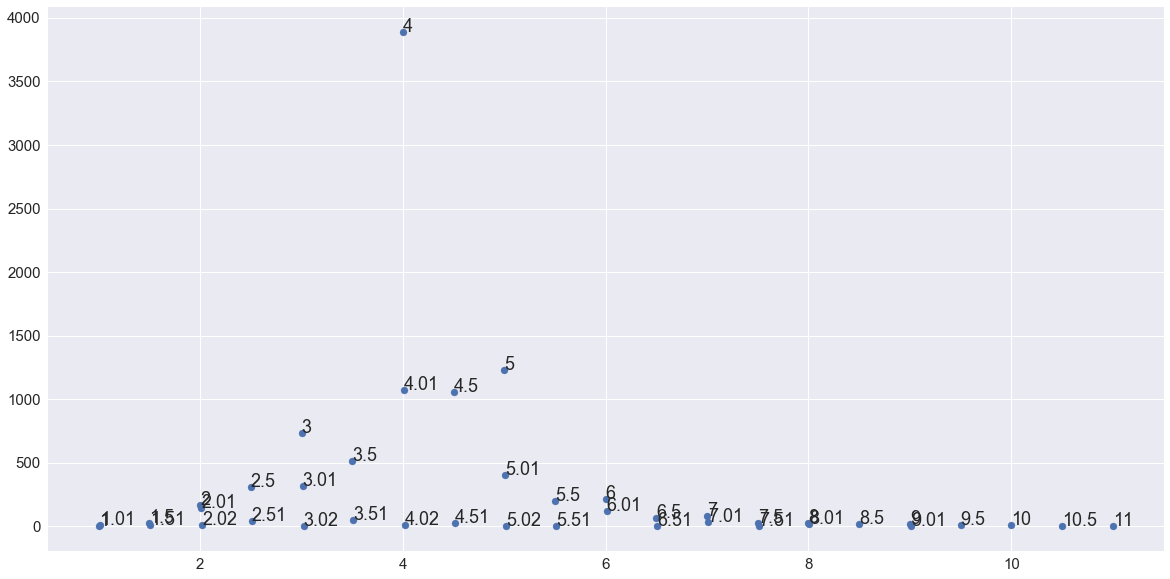

In [201]:
#scatter plot of years to graduate
sns.set(font_scale=1.5)
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(times, counterp)
for i, txt in enumerate(times):
    ax.annotate(txt, (times[i],counterp[i]))

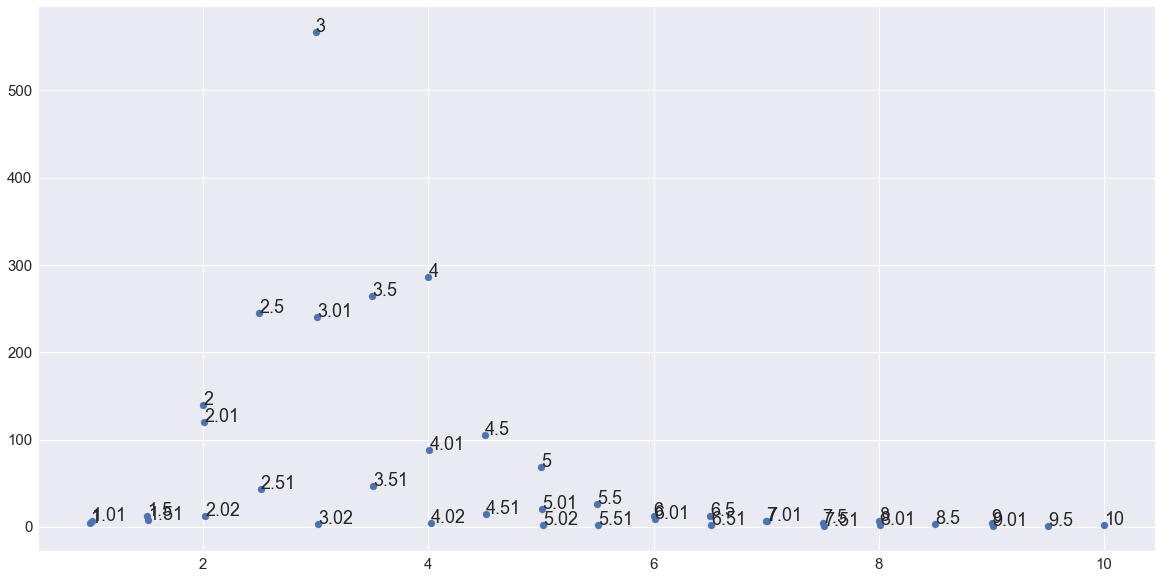

In [206]:
#scatter plot of years to graduate for transfers
sns.set(font_scale=1.5)
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(transfer_times, transfer_counterp)
for i, txt in enumerate(transfer_times):
    ax.annotate(txt, (transfer_times[i],transfer_counterp[i]))

(array([  1.40000000e+01,   0.00000000e+00,   3.40000000e+01,
          0.00000000e+00,   0.00000000e+00,   3.19000000e+02,
          0.00000000e+00,   3.52000000e+02,   0.00000000e+00,
          0.00000000e+00,   1.05100000e+03,   0.00000000e+00,
          5.66000000e+02,   0.00000000e+00,   0.00000000e+00,
          4.97100000e+03,   0.00000000e+00,   1.08300000e+03,
          0.00000000e+00,   0.00000000e+00,   1.63800000e+03,
          0.00000000e+00,   2.07000000e+02,   0.00000000e+00,
          0.00000000e+00,   3.37000000e+02,   0.00000000e+00,
          6.70000000e+01,   0.00000000e+00,   0.00000000e+00,
          1.15000000e+02,   0.00000000e+00,   2.40000000e+01,
          0.00000000e+00,   0.00000000e+00,   4.80000000e+01,
          0.00000000e+00,   1.40000000e+01,   0.00000000e+00,
          0.00000000e+00,   2.50000000e+01,   0.00000000e+00,
          9.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+01,   0.00000000e+00,   3.00000000e+00,
        

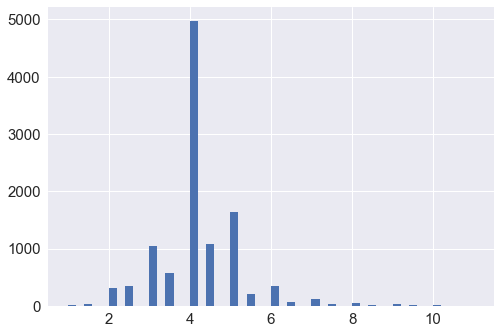

In [204]:
#histogram for years of students
plt.hist(time,bins=50)

(array([  11.,    0.,   21.,    0.,    0.,  272.,    0.,    0.,  288.,
           0.,    0.,  810.,    0.,  312.,    0.,    0.,  378.,    0.,
           0.,  120.,    0.,    0.,   91.,    0.,    0.,   28.,    0.,
          22.,    0.,    0.,   15.,    0.,    0.,   14.,    0.,    0.,
           5.,    0.,    9.,    0.,    0.,    3.,    0.,    0.,    5.,
           0.,    0.,    1.,    0.,    2.]),
 array([  1.  ,   1.18,   1.36,   1.54,   1.72,   1.9 ,   2.08,   2.26,
          2.44,   2.62,   2.8 ,   2.98,   3.16,   3.34,   3.52,   3.7 ,
          3.88,   4.06,   4.24,   4.42,   4.6 ,   4.78,   4.96,   5.14,
          5.32,   5.5 ,   5.68,   5.86,   6.04,   6.22,   6.4 ,   6.58,
          6.76,   6.94,   7.12,   7.3 ,   7.48,   7.66,   7.84,   8.02,
          8.2 ,   8.38,   8.56,   8.74,   8.92,   9.1 ,   9.28,   9.46,
          9.64,   9.82,  10.  ]),
 <a list of 50 Patch objects>)

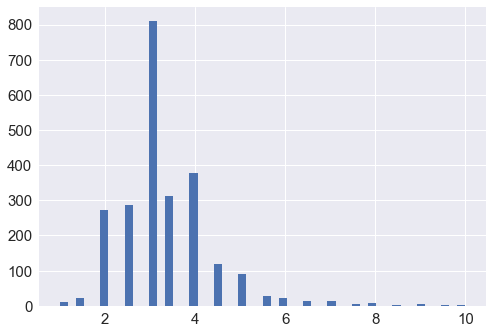

In [205]:
#histogram of years of transfer students
plt.hist(transfer_time,bins=50)